# Notebook 2 of 2

## This noteboook continues the work started in Notebook 1.        
> ### Here we will iterate through several neural network models to find the best accurracy in predicting whether a B-cell is normal or malignant with Acute Lymphoblastic Leukemia


In [132]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
import pandas as pd
import numpy as np
import csv
import os
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import StandardScaler, LabelBinarizer, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_predict
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from keras import layers
from keras import optimizers
from keras import initializers
from keras.wrappers.scikit_learn import KerasRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D,BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam, Adamax, RMSprop
from tensorflow.keras.metrics import binary_crossentropy, categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, load_model, Sequential
from keras.utils.np_utils import to_categorical
import numpy as np
import pandas as pd
import shutil
import time
import cv2 as cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight 
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns
sns.set_style('darkgrid')
from PIL import Image
import time
import scipy
from scipy import ndimage
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from IPython.core.display import display, HTML
# stop annoying tensorflow warning messages
import logging
import splitfolders
logging.getLogger("tensorflow").setLevel(logging.ERROR)
np.random.seed(123)
print ('modules loaded')

modules loaded


### First we must generate the data in this notebook.

In [133]:
# Create data generators
train_generator = ImageDataGenerator(rescale=1./255, 
        rotation_range=180, fill_mode='nearest',
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.5,1.5]).flow_from_directory('data/tvt/train',
                                                        classes={'Normal':0, 'ALL':1},
                                                        class_mode='categorical',
                                                        batch_size=10024)

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        'data/tvt/validation',
        class_mode='categorical',
        batch_size = 2379)

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        'data/tvt/test',
        class_mode='categorical',
        batch_size = 125)

Found 10024 images belonging to 2 classes.
Found 2379 images belonging to 2 classes.
Found 125 images belonging to 2 classes.


In [134]:
# create the data sets
train_images, train_labels = next(train_generator)
val_images, val_labels = next(val_generator)
test_images, test_labels = next(test_generator)

In [135]:
train_images.shape

(10024, 256, 256, 3)

In [136]:
#  Un-row the image matrices for modeling
train_x = train_images.reshape(train_images.shape[0], -1)
test_x = test_images.reshape(test_images.shape[0], -1)
val_x = val_images.reshape(val_images.shape[0], -1)

In [137]:
train_x.shape

(10024, 196608)

In [138]:
# train_x /= 255.
# test_x /= 255.
# val_x /= 255.

In [139]:
train_labels[:10]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [140]:
y_train = train_labels.astype('float32')
y_val = val_labels.astype('float32')
y_test = test_labels.astype('float32')

In [141]:
y_train[:10]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [142]:
# The datasets is imbalanced so we will define class_weight = balanced
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(train_generator.classes),
                                                  y=train_generator.classes
                                                 )

train_class_weights = dict(enumerate(class_weights))

## Build a basic Convolutional Neural Network

In [143]:
cnn_aug = models.Sequential()

cnn_aug.add(layers.Conv2D(32,(3,3), activation='relu', padding='same', input_shape=(256,256,3)))
cnn_aug.add(layers.MaxPool2D(2,2))

cnn_aug.add(layers.Conv2D(64,(3,3), activation='relu', padding='same'))
cnn_aug.add(layers.MaxPool2D(2,2))

cnn_aug.add(layers.Conv2D(64,(3,3), activation='relu', padding='same'))
cnn_aug.add(layers.MaxPool2D(2,2))

cnn_aug.add(layers.Flatten())
cnn_aug.add(layers.Dense(64, activation='relu'))
cnn_aug.add(layers.Dense(2, activation='sigmoid'))

In [144]:
# Compile the model
cnn_aug.compile(optimizer=RMSprop(learning_rate=0.0001),
            loss='binary_crossentropy',
            metrics=['accuracy'])

# Fit and Train the model with more epochs
cnn_aug_history = cnn_aug.fit(train_images, y_train,
                        epochs=80,
                        batch_size=100,
                        validation_data=(val_images, y_val))
#                         class_weight=train_class_weights)

Epoch 1/80
101/101 [==============================] - 256s 3s/step - loss: 0.5893 - accuracy: 0.7140 - val_loss: 0.8013 - val_accuracy: 0.2724
Epoch 2/80
101/101 [==============================] - 257s 3s/step - loss: 0.5702 - accuracy: 0.7252 - val_loss: 0.8884 - val_accuracy: 0.2703
Epoch 3/80
101/101 [==============================] - 255s 3s/step - loss: 0.5621 - accuracy: 0.7310 - val_loss: 0.7329 - val_accuracy: 0.6011
Epoch 4/80
101/101 [==============================] - 244s 2s/step - loss: 0.5578 - accuracy: 0.7303 - val_loss: 0.9766 - val_accuracy: 0.2774
Epoch 5/80
101/101 [==============================] - 246s 2s/step - loss: 0.5505 - accuracy: 0.7340 - val_loss: 0.9740 - val_accuracy: 0.2711
Epoch 6/80
101/101 [==============================] - 243s 2s/step - loss: 0.5444 - accuracy: 0.7382 - val_loss: 0.9891 - val_accuracy: 0.2699
Epoch 7/80
101/101 [==============================] - 245s 2s/step - loss: 0.5363 - accuracy: 0.7433 - val_loss: 0.8875 - val_accuracy: 0.2568

Epoch 58/80
101/101 [==============================] - 261s 3s/step - loss: 0.3003 - accuracy: 0.8711 - val_loss: 1.5062 - val_accuracy: 0.3056
Epoch 59/80
101/101 [==============================] - 258s 3s/step - loss: 0.2966 - accuracy: 0.8747 - val_loss: 1.7756 - val_accuracy: 0.2514
Epoch 60/80
101/101 [==============================] - 253s 3s/step - loss: 0.2929 - accuracy: 0.8735 - val_loss: 2.0658 - val_accuracy: 0.2434
Epoch 61/80
101/101 [==============================] - 253s 3s/step - loss: 0.2881 - accuracy: 0.8779 - val_loss: 1.8056 - val_accuracy: 0.2358
Epoch 62/80
101/101 [==============================] - 239s 2s/step - loss: 0.2793 - accuracy: 0.8826 - val_loss: 1.7303 - val_accuracy: 0.2984
Epoch 63/80
101/101 [==============================] - 245s 2s/step - loss: 0.2804 - accuracy: 0.8815 - val_loss: 1.7572 - val_accuracy: 0.2509
Epoch 64/80
101/101 [==============================] - 244s 2s/step - loss: 0.2745 - accuracy: 0.8847 - val_loss: 1.8230 - val_accuracy:

In [151]:
# Create visualization functions

def visualize_training_results(results):
    history = results.history
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(17,5))
    ax1.plot(history['loss'], label='Loss')
    ax1.plot(history['val_loss'], label='Val Loss')
    ax1.grid(False)
    ax1.legend()

    ax2.plot(history['accuracy'], label = 'Accuracy')
    ax2.plot(history['val_accuracy'], label='Val Accuracy')
    ax2.grid(False)
    ax2.legend();

def plot_confusion_matrix(model, y_true, y_images):
    predictions = model.predict(y_images)
    y_pred = np.round(predictions, 0)
#     y_pred = np.reshape(y_pred, -1)

    print(classification_report(y_true, y_pred))
    
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['ALL','Normal'])
    disp.plot(cmap=plt.cm.Blues)
    plt.grid(False)
    plt.show()   

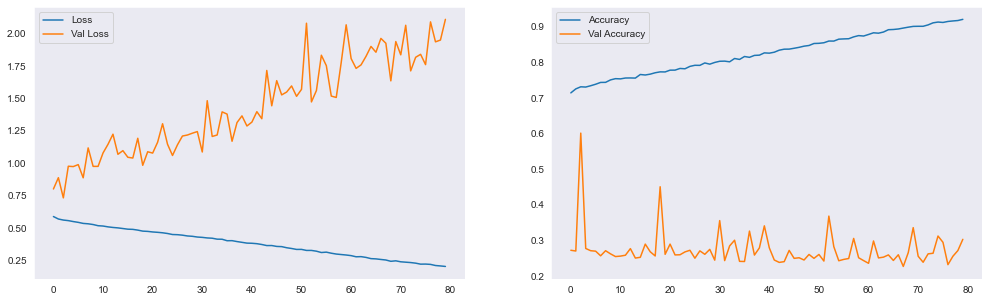

In [146]:
visualize_training_results(cnn_aug_history)

In [147]:
train_results = cnn_aug.evaluate(train_images, y_train)

314/314 [==============================] - 74s 234ms/step - loss: 0.2038 - accuracy: 0.9210


In [148]:
val_results = cnn_aug.evaluate(val_images, y_val)

75/75 [==============================] - 17s 232ms/step - loss: 2.1078 - accuracy: 0.3031


In [149]:
test_results = cnn_aug.evaluate(test_images, y_test)

4/4 [==============================] - 1s 237ms/step - loss: 2.4032 - accuracy: 0.2400


In [152]:
plot_confusion_matrix(cnn_aug, y_test, test_images)

              precision    recall  f1-score   support

           0       0.32      0.20      0.25        79
           1       0.18      0.28      0.22        46

   micro avg       0.24      0.23      0.24       125
   macro avg       0.25      0.24      0.24       125
weighted avg       0.27      0.23      0.24       125
 samples avg       0.22      0.23      0.23       125



/Users/patrick/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: multilabel-indicator is not supported

In [153]:
tf.keras.models.save_model(cnn_aug,'my_model.hdf5')
model = tf.keras.models.load_model('my_model.hdf5')

In [104]:
# Import skimage modules
from skimage import data, img_as_float
from skimage import exposure

# Lets try augmenting a cifar10 image using these techniques
from skimage import data, img_as_float
from skimage import exposure

# Load an example image from cifar10 dataset
img = train_images[4780]

# Set font size for images
matplotlib.rcParams['font.size'] = 8

# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Histogram Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

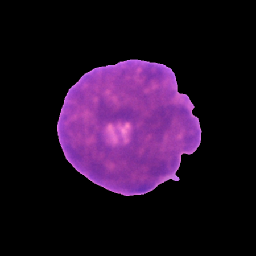

In [142]:
array_to_img(img)

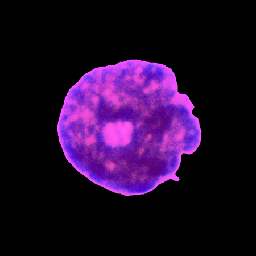

In [105]:
array_to_img(img_eq)

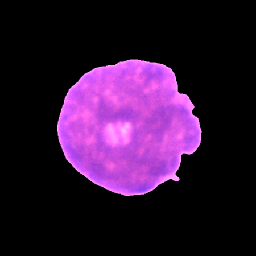

In [106]:
array_to_img(img_rescale)

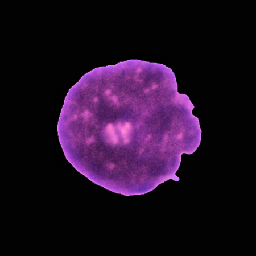

In [141]:
array_to_img(img_adapteq)

In [131]:
"""
@file laplace_demo.py
@brief Sample code showing how to detect edges using the Laplace operator
"""
import sys
import cv2 as cv
def main(src):
    # [variables]
    # Declare the variables we are going to use
#     ddepth = cv.CV_16S
#     kernel_size = 3
#     window_name = "Laplace Demo"
    # [variables]
    # [load]
#     imageName = argv[0] if len(argv) > 0 else 'lena.jpg'
    src = source = cv2.imread(train_images[7000], cv2.IMREAD_COLOR)
    # Check if image is loaded fine
#     if src is None:
#         print ('Error opening image')
#         print ('Program Arguments: [image_name -- default lena.jpg]')
#         return -1
    # [load]
    # [reduce_noise]
    # Remove noise by blurring with a Gaussian filter
    src = cv.GaussianBlur(src, (3, 3), 0)
    # [reduce_noise]
    # [convert_to_gray]
    # Convert the image to grayscale
    src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
    # [convert_to_gray]
    # Create Window
    cv.namedWindow(window_name, cv.WINDOW_AUTOSIZE)
    # [laplacian]
    # Apply Laplace function
    dest = cv.Laplacian(src_gray, cv.CV_16S, ksize=3)
    # [laplacian]
    # [convert]
    # converting back to uint8
    abs_dest = cv.convertScaleAbs(dest)
    # [convert]
    # [display]
    plt.imshow(abs_dest, cmap="gray")

    # [display]
#     return 0
# if __name__ == "__main__":
#     main(sys.argv[1:])

In [133]:
type(train_images[0])

numpy.ndarray

In [134]:
from scipy.ndimage.filters import laplace

In [139]:
lap_img = laplace(train_images[5999])

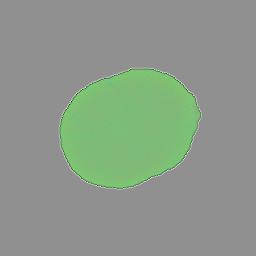

In [140]:
array_to_img(lap_img)